In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#We suppose f is continuous, and that f has different
# signs in x1 and x2 (x1<x2), that is:
# f(x1)f(x2) < 0,
# meaning f will cross the x axis somewhere in the interval [x1,x2]

#The following function applies a bissection to the inverval [x1,x2],
# based on wether f has crossed the x axis between x1 and (x1+x2)/2 or not.
# If affirmative, [(x1+x2)/2, x2] is the new interval where a zero must lie,
# otherwise [x1, (x1+x2)/2] is such an interval.

def bissect(f,x1,x2):
    x_new = (x1+x2)/2
    f_new = f(x_new)
    
    if f(x1)*f_new > 0:
        x1 = x_new
    elif f_new == 0:
        #Cheap trick to avoid calculating f(x_new) again
        return (x_new, 'Found')
    else:
        x2 = x_new
    
    return (x1,x2)

#An approximate zero of the function is found by repeatedly bissecting,
# and therefore restricting, the interval [x1,x2] where a zero must lie until
# |x2 - x1| < precision, meaning the zero is known with such precision too.

def zero(f,x1,x2,N=50,precision=1e-4):
    if f(x1)*f(x2) > 0:
        raise Exception("The interval provided does not satisfy the condition f(x1)f(x2) < 0")
    for i in range(N):
        x1,x2 = bissect(f,x1,x2)
        if x2 == 'Found':
            return x1
        if np.linalg.norm(x1-x2) < precision:
            return x1
    #The maximum number of iteractions have gone already without reaching a zero with
    # the desired precision, so return the best possible estimate.
    return (x1+x2)/2

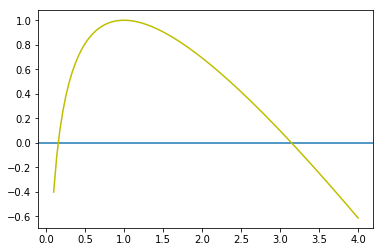

In [43]:
#Draw an example function f(x) = 2-x+ln(x), in such a way that an initial
# interval containing a zero is evident.

def f(x):
    return 2 - x + np.log(x)
    
x = np.linspace(0.1,4,100)
plt.axhline()
plt.plot(x, f(x),color='y')

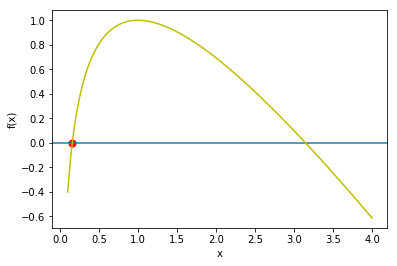

In [42]:
#Make the precise calculation using the bissection method and plot the result

x1 = 0.1
x2 = 2.0

x_sol = zero(f,x1,x2)

x = np.linspace(0.1,4,100)
plt.axhline()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, f(x),color='y')
plt.scatter(x_sol, f(x_sol), color = 'r', s=50)

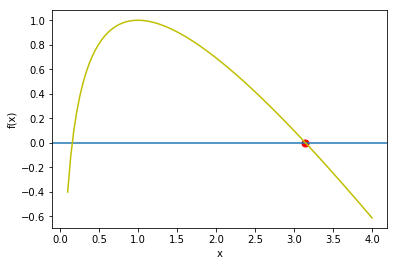

In [46]:
#Now let's find the other zero

x1 = 2.0
x2 = 4.0

x_sol = zero(f,x1,x2)

x = np.linspace(0.1,4,100)
plt.axhline()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, f(x),color='y')
plt.scatter(x_sol, f(x_sol), color = 'r', s=50)